# Start
First, we attached sensors to different individuals and recorded plantar foot forces using various sensors under different conditions.  
The forces include heel force, midfoot force, and arch force.  
The data were recorded separately for the right and left feet and collected at different time points.   
The time interval changes by 0.01 seconds.  
The surfaces include: ["Gravel", "Asphalt", "Sand", "Grass", "Forest", "Wood"].  
The input files are in `.txt` format.  
First, we read all the files, and then proceed to analyze each dataset.

Import library

In [1]:
#basic
import os
import math

#analysis
import numpy as np
import pandas as pd

#Statistik
import scipy.stats as stats

#plot
import matplotlib.pyplot as plt
import seaborn as sns

# folder Force data (novel loadsol 2)
Time[secs]: Zeit  
Heel: Ferse   
Midfoot: Fußgewölbe  
Forefoot: Zehe  

In [2]:
file_path = r"C:/Users/user/Desktop/Fatemeh/Analysis_Data/data/raw/Force data (novel loadsol 2)/Force data/loadsolASCII_25-11-11 09-24-19-079.txt"

df = pd.read_csv(
    file_path,
    sep="\t",        # جداکننده TAB
    decimal=",",     # تبدیل کاما به نقطه اعشاری
)

df.head()


,Time[secs],PRY201_L_Heel,PRY201_L_Midfoot,PRY201_L_Forefoot,PRY201_L,Time[secs].1,PRY202_R_Forefoot,PRY202_R_Midfoot,PRY202_R_Heel,PRY202_R
0,0,99.71,124.49,147.5,371.7,0,119.68,99.84,157.44,376.96
1,0.01,102.07,124.49,147.5,374.06,0.01,122.24,99.84,160,382.08
2,0.02,99.71,122.13,144.55,366.39,0.02,119.68,99.84,160,379.52
3,0.03,99.71,122.13,142.19,364.03,0.03,122.24,102.4,160,384.64
4,0.04,97.35,122.13,142.19,361.67,0.04,124.8,102.4,160,387.2


# Read all data for analyis

In [3]:
#path
path = r"C:/Users/user/Desktop/Fatemeh/Analysis_Data/data/raw/Force data (novel loadsol 2)/All by category"

# read all data when that is .txt
file_names = [f for f in os.listdir(path) if f.endswith('.txt')]

#clear name and remove space and - from name
def sanitize_name(name: str) -> str:
    name = name.replace(".txt", "")
    name = name.replace(" ", "_").replace("-", "_")
    name = ''.join(c if c.isalnum() or c == '_' else '_' for c in name)
    if name and name[0].isdigit():
        name = '_' + name
    return name


list_name_dataframe=[]
# read all data
for file_name in file_names:
    var_name = sanitize_name(file_name)
    file_path = os.path.join(path, file_name)
    
    print(f" file: {var_name} -- name dataframe: {file_name}")
    
    try:
        df = pd.read_csv(
            file_path,
            sep="\t",
            decimal=",",
            engine="python"
        )
        df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
        
        #creat one liest by name of datafram
        list_name_dataframe.append(var_name)

        # name of data frame
        globals()[var_name] = df
        
        
    except Exception as e:
        print(f" --------Error---- {file_name}: {e}")



 file: loadsolASCII_25_11_11_09_24_19_079_Gravel -- name dataframe: loadsolASCII_25-11-11 09-24-19-079_Gravel.txt
 file: loadsolASCII_25_11_11_09_38_11_074_Asphalt -- name dataframe: loadsolASCII_25-11-11 09-38-11-074_Asphalt.txt
 file: loadsolASCII_25_11_11_09_52_01_474_Sand -- name dataframe: loadsolASCII_25-11-11 09-52-01-474_Sand.txt
 file: loadsolASCII_25_11_11_10_06_34_305_Grass -- name dataframe: loadsolASCII_25-11-11 10-06-34-305_Grass.txt
 file: loadsolASCII_25_11_11_10_09_51_519_Grass -- name dataframe: loadsolASCII_25-11-11 10-09-51-519_Grass.txt
 file: loadsolASCII_25_11_11_13_49_21_080_Grass -- name dataframe: loadsolASCII_25-11-11 13-49-21-080_Grass.txt
 file: loadsolASCII_25_11_11_13_54_44_511_Grass -- name dataframe: loadsolASCII_25-11-11 13-54-44-511_Grass.txt
 file: loadsolASCII_25_11_11_14_09_23_595_Sand -- name dataframe: loadsolASCII_25-11-11 14-09-23-595_Sand.txt
 file: loadsolASCII_25_11_11_14_21_20_634_Asphalt -- name dataframe: loadsolASCII_25-11-11 14-21-20-63

read and save as csv

In [ ]:
input_path = r"C:/Users/user/Desktop/Fatemeh/Analysis_Data/data/raw/Force data (novel loadsol 2)/All by category"
output_path = r"C:/Users/user/Desktop/Fatemeh/Analysis_Data/data/raw/Force data (novel loadsol 2)/Data as scv"  # اصلاح شد: ata → data

os.makedirs(output_path, exist_ok=True)

file_names = [f for f in os.listdir(input_path) if f.endswith('.txt')]

def sanitize_name(name: str) -> str:
    name = name.replace(".txt", "")
    name = name.replace(" ", "_").replace("-", "_")
    name = ''.join(c if c.isalnum() or c == '_' else '_' for c in name)
    if name and name[0].isdigit():
        name = '_' + name
    return name

for file_name in file_names:
    var_name = sanitize_name(file_name)
    input_file = os.path.join(input_path, file_name)
    output_file = os.path.join(output_path, f"{var_name}.csv")
    
    try:
        df = pd.read_csv(input_file, sep="\t", decimal=",", engine="python")
        df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
        df.to_csv(output_file, index=False)
        print(f"Saved: {output_file}")
    except Exception as e:
        print(f"Error: {file_name} - {e}")

Saved: C:/Users/abolhassni/Desktop/TU Darmstadt/Term 2/bewegung/Bewegunganalysieren/Bewegung/data/raw/Force data (novel loadsol 2)/all data csv\loadsolASCII_25_11_11_09_24_19_079_Gravel.csv
Saved: C:/Users/abolhassni/Desktop/TU Darmstadt/Term 2/bewegung/Bewegunganalysieren/Bewegung/data/raw/Force data (novel loadsol 2)/all data csv\loadsolASCII_25_11_11_09_38_11_074_Asphalt.csv
Saved: C:/Users/abolhassni/Desktop/TU Darmstadt/Term 2/bewegung/Bewegunganalysieren/Bewegung/data/raw/Force data (novel loadsol 2)/all data csv\loadsolASCII_25_11_11_09_52_01_474_Sand.csv
Saved: C:/Users/abolhassni/Desktop/TU Darmstadt/Term 2/bewegung/Bewegunganalysieren/Bewegung/data/raw/Force data (novel loadsol 2)/all data csv\loadsolASCII_25_11_11_10_06_34_305_Grass.csv
Saved: C:/Users/abolhassni/Desktop/TU Darmstadt/Term 2/bewegung/Bewegunganalysieren/Bewegung/data/raw/Force data (novel loadsol 2)/all data csv\loadsolASCII_25_11_11_10_09_51_519_Grass.csv
Saved: C:/Users/abolhassni/Desktop/TU Darmstadt/Term 

## 1. list of dataframe by category
select one category


In [4]:
list_of_dataframe = pd.DataFrame(list_name_dataframe, columns=["category"])
category = pd.DataFrame(["Gravel", "Asphalt", "Sand", "Grass", "Forest", "Wood"],columns=["category"])
mask = category["category"][1]
list_of_dataframe_mask = list_of_dataframe[list_of_dataframe["category"].str.contains(mask, na=False)]
list_of_dataframe_mask

,category
1,loadsolASCII_25_11_11_09_38_11_074_Asphalt
8,loadsolASCII_25_11_11_14_21_20_634_Asphalt
10,loadsolASCII_25_11_13_10_16_07_282_Asphalt
18,loadsolASCII_25_11_13_14_44_02_331_Asphalt
21,loadsolASCII_25_11_14_10_00_15_439_Asphalt
24,loadsolASCII_25_11_16_14_07_55_722_Asphalt
31,loadsolASCII_25_11_17_10_09_36_341_Asphalt


1.1. Data about loadsolASCII_25_11_11_09_38_11_074

In [5]:
loadsolASCII_25_11_11_09_38_11_074_Asphalt.head(5)

,Time[secs],PRY201_L_Heel,PRY201_L_Midfoot,PRY201_L_Forefoot,PRY201_L,Time[secs].1,PRY202_R_Forefoot,PRY202_R_Midfoot,PRY202_R_Heel,PRY202_R
0,0.00,182.04,162.06,127.28,471.38,0.00,84.68,99.76,145.00,329.44
1,0.01,182.04,162.06,127.28,471.38,0.01,84.68,99.76,142.10,326.54
2,0.02,185.00,164.28,127.28,476.56,0.02,87.00,99.76,142.10,328.86
3,0.03,182.04,162.06,127.28,471.38,0.03,87.00,99.76,139.78,326.54
4,0.04,182.04,164.28,127.28,473.60,0.04,87.00,99.76,137.46,324.22


1.2. Is not any NULL

In [6]:
loadsolASCII_25_11_11_09_38_11_074_Asphalt.isnull().sum()

Time[secs]           0
PRY201_L_Heel        0
PRY201_L_Midfoot     0
PRY201_L_Forefoot    0
PRY201_L             0
Time[secs].1         0
PRY202_R_Forefoot    0
PRY202_R_Midfoot     0
PRY202_R_Heel        0
PRY202_R             0
dtype: int64

In [7]:
loadsolASCII_25_11_11_09_38_11_074_Asphalt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20760 entries, 0 to 20759
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time[secs]         20760 non-null  float64
 1   PRY201_L_Heel      20760 non-null  float64
 2   PRY201_L_Midfoot   20760 non-null  float64
 3   PRY201_L_Forefoot  20760 non-null  float64
 4   PRY201_L           20760 non-null  float64
 5   Time[secs].1       20760 non-null  float64
 6   PRY202_R_Forefoot  20760 non-null  float64
 7   PRY202_R_Midfoot   20760 non-null  float64
 8   PRY202_R_Heel      20760 non-null  float64
 9   PRY202_R           20760 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


The minimum value for the right foot is reported as -1, but the sum is zero. This suggests an issue in the data recording process, and those values should likely be zero.

In [8]:
loadsolASCII_25_11_11_09_38_11_074_Asphalt.describe()

,Time[secs],PRY201_L_Heel,PRY201_L_Midfoot,PRY201_L_Forefoot,PRY201_L,Time[secs].1,PRY202_R_Forefoot,PRY202_R_Midfoot,PRY202_R_Heel,PRY202_R
count,20760.000000,20760.000000,20760.000000,20760.000000,20760.000000,20760.000000,20760.000000,20760.000000,20760.000000,20760.000000
mean,103.795000,118.393413,121.036095,163.689862,403.119369,103.795000,172.022418,92.143819,106.275951,370.444355
std,59.930401,201.471657,192.086676,251.682801,488.225529,59.930401,269.158161,173.775722,209.517378,492.541484
min,0.000000,0.000000,0.000000,0.000000,2.510000,0.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,51.897500,7.500000,4.980000,0.000000,19.950000,51.897500,0.000000,0.000000,0.000000,4.960000
50%,103.795000,12.500000,9.960000,5.000000,49.620000,103.795000,9.750000,0.000000,2.400000,49.805000
75%,155.692500,163.432500,194.880000,231.020000,765.600000,155.692500,253.937500,68.500000,94.510000,749.360000
max,207.590000,1040.000000,707.370000,982.500000,1571.220000,207.590000,1057.500000,653.250000,1072.500000,1568.700000


In [9]:
loadsolASCII_25_11_11_09_38_11_074_Asphalt = loadsolASCII_25_11_11_09_38_11_074_Asphalt.replace(-1, 0)
loadsolASCII_25_11_11_09_38_11_074_Asphalt.describe()

,Time[secs],PRY201_L_Heel,PRY201_L_Midfoot,PRY201_L_Forefoot,PRY201_L,Time[secs].1,PRY202_R_Forefoot,PRY202_R_Midfoot,PRY202_R_Heel,PRY202_R
count,20760.000000,20760.000000,20760.000000,20760.000000,20760.000000,20760.000000,20760.000000,20760.000000,20760.000000,20760.000000
mean,103.795000,118.393413,121.036095,163.689862,403.119369,103.795000,172.023140,92.144541,106.276673,370.444355
std,59.930401,201.471657,192.086676,251.682801,488.225529,59.930401,269.157698,173.775337,209.517010,492.541484
min,0.000000,0.000000,0.000000,0.000000,2.510000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.897500,7.500000,4.980000,0.000000,19.950000,51.897500,0.000000,0.000000,0.000000,4.960000
50%,103.795000,12.500000,9.960000,5.000000,49.620000,103.795000,9.750000,0.000000,2.400000,49.805000
75%,155.692500,163.432500,194.880000,231.020000,765.600000,155.692500,253.937500,68.500000,94.510000,749.360000
max,207.590000,1040.000000,707.370000,982.500000,1571.220000,207.590000,1057.500000,653.250000,1072.500000,1568.700000


1.3. We compared the right and left feet.

1.3.1. Heel Force
The averages are close to each other, which is what we expected.  
The standard deviations are close to each other, which is what we expected.  
Based on the quartiles, a small difference is observed in the second quartile, but this difference becomes substantial in the third quartile.  
Given that the means and standard deviations are close to each other, and considering that the maximum values are also similar, it can be inferred that the right foot likely exhibits greater force fluctuations compared to the left foot.

In [10]:
loadsolASCII_25_11_11_09_38_11_074_Asphalt[["PRY201_L_Heel","PRY202_R_Heel"]].describe()

,PRY201_L_Heel,PRY202_R_Heel
count,20760.000000,20760.000000
mean,118.393413,106.276673
std,201.471657,209.517010
min,0.000000,0.000000
25%,7.500000,0.000000
50%,12.500000,2.400000
75%,163.432500,94.510000
max,1040.000000,1072.500000


Based on the total forces — which are higher on the left foot compared to the right — and also the average forces, which again are greater on the left side, we can conclude that the dominant foot is the left foot.
The reason the right foot shows a higher maximum force is that the standard deviations are very close; at certain points, the participant unintentionally applied more force on the right foot to maintain a straight walking path and compensate for a natural tendency to drift to the left.

In [11]:
print(f"Left Heel force: {loadsolASCII_25_11_11_09_38_11_074_Asphalt["PRY201_L_Heel"].sum()}")
print(f"Right Heel force: {loadsolASCII_25_11_11_09_38_11_074_Asphalt["PRY202_R_Heel"].sum()}")

Left Heel force: 2457847.25
Right Heel force: 2206303.74


The plot clearly shows that the subject began walking around second 15. The data after second 15 exhibits a walking pattern, as evidenced by the alternating force profile: when the right foot force approaches zero, the left foot reaches its local maximum, and vice versa.

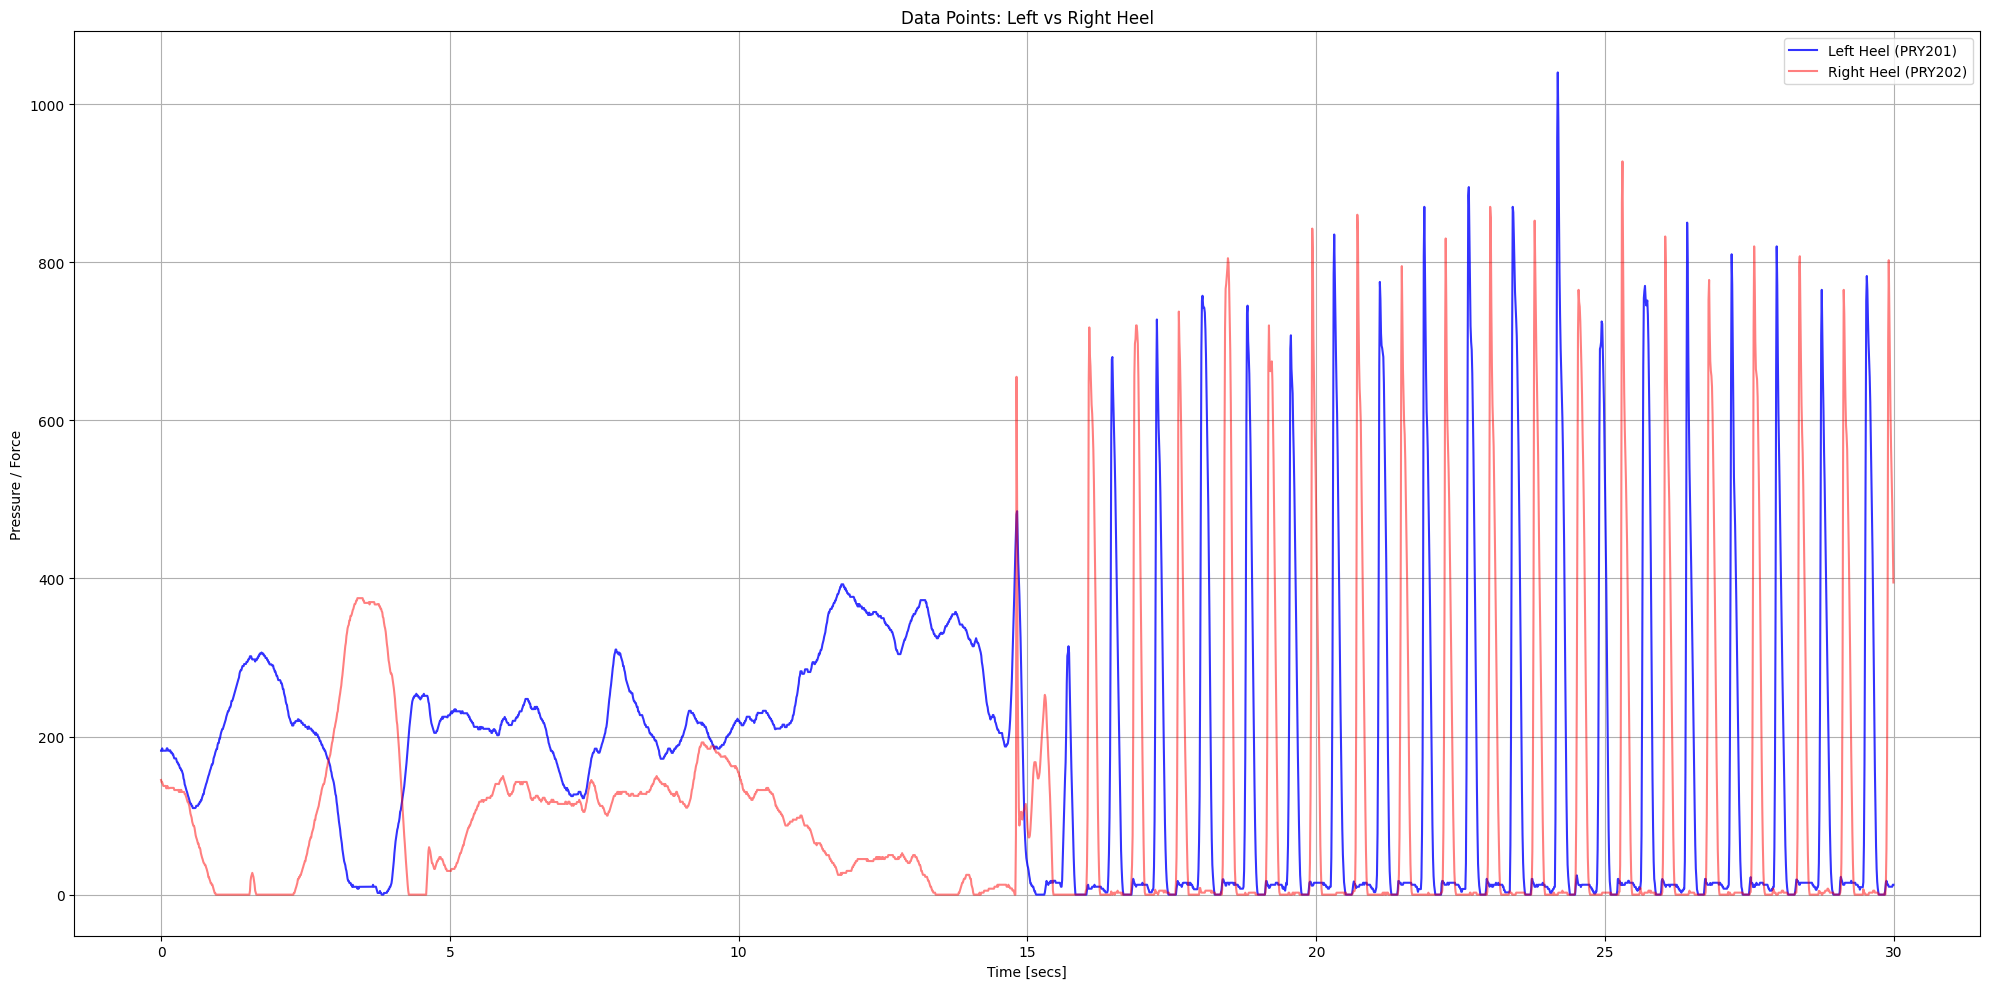

In [12]:
df_first = loadsolASCII_25_11_11_09_38_11_074_Asphalt.iloc[:3000]

plt.figure(figsize=(20, 10))

plt.plot(df_first['Time[secs]'],
         df_first['PRY201_L_Heel'],
         label='Left Heel (PRY201)', color='blue', alpha=0.80)

plt.plot(df_first['Time[secs]'],
         df_first['PRY202_R_Heel'],
         label='Right Heel (PRY202)', color='red',alpha=0.50)

plt.xlabel('Time [secs]')
plt.ylabel('Pressure / Force')
plt.title('Data Points: Left vs Right Heel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Furthermore, from around second 195 onward, the subject appears to exhibit behaviors resembling standing still or taking short, irregular steps—likely due to the conclusion of the experimental protocol—resulting in signal dropouts. From approximately second 202 onward, the data suggests the subject is standing upright on both feet.

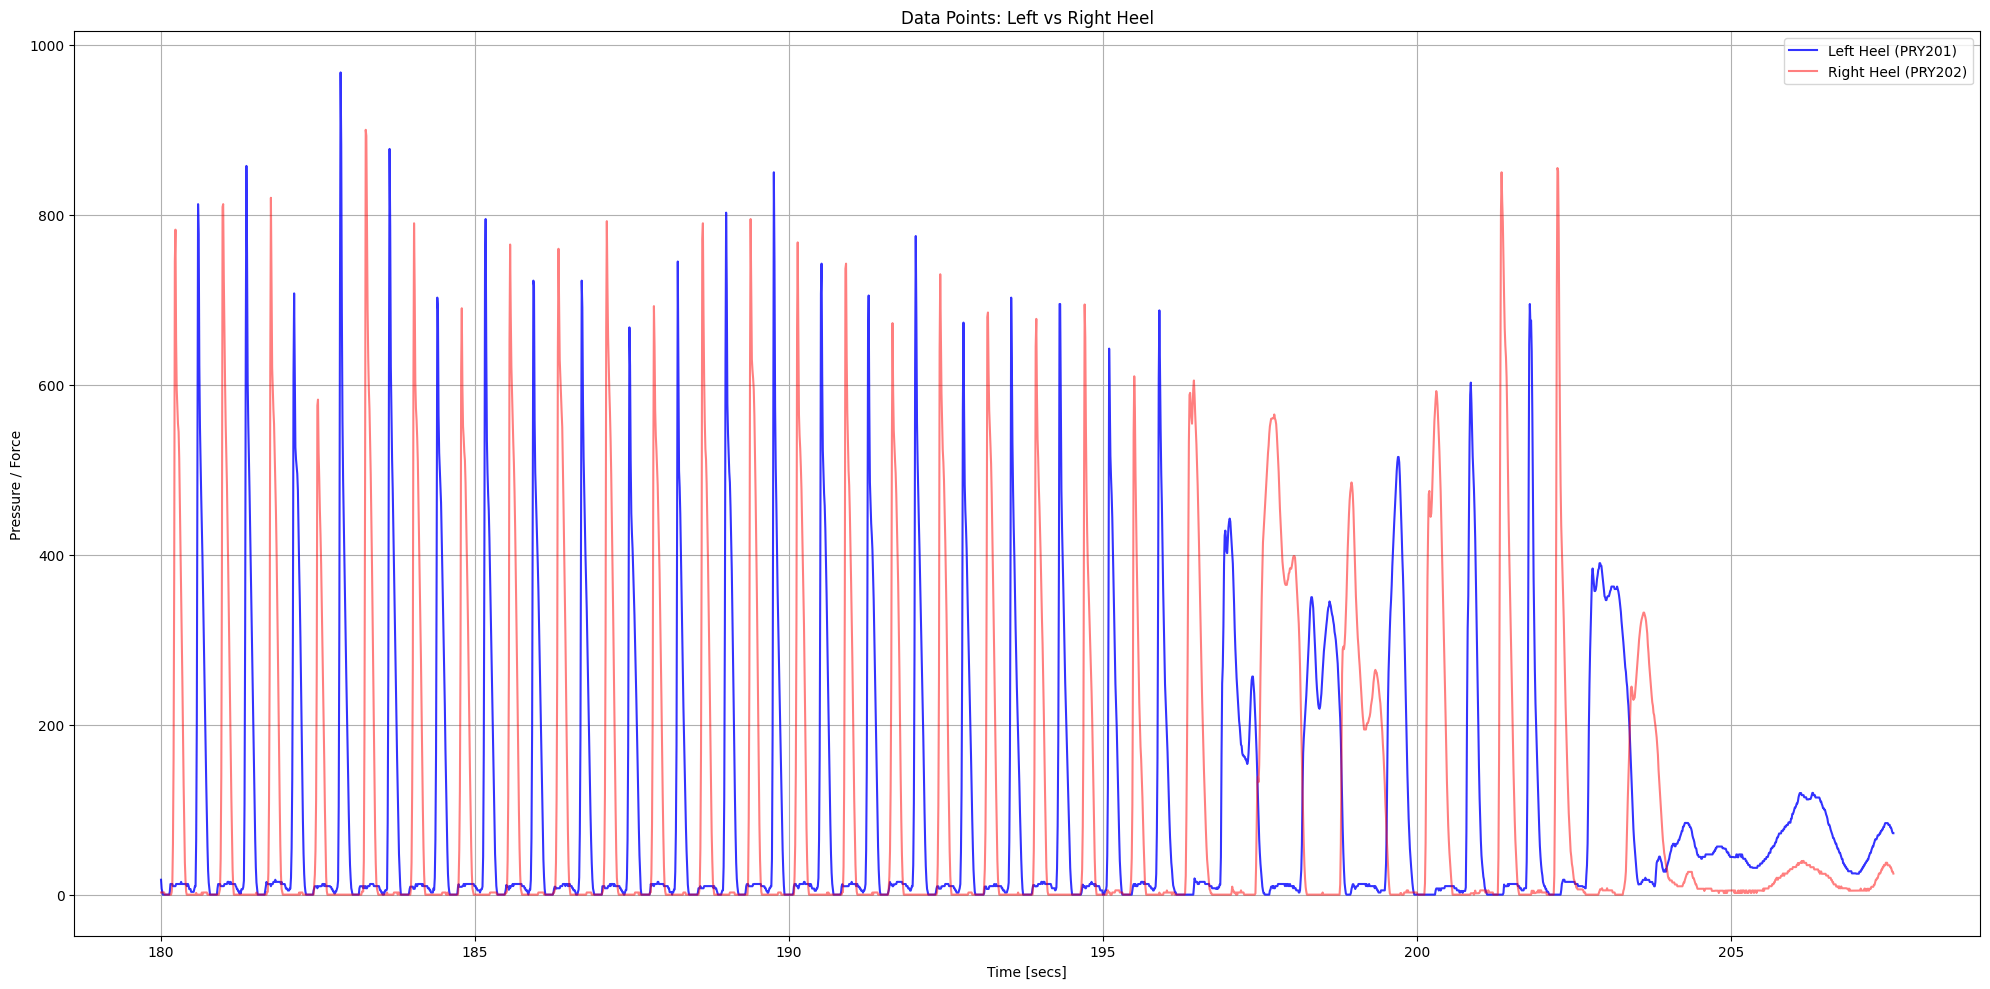

In [13]:
df_end = loadsolASCII_25_11_11_09_38_11_074_Asphalt.iloc[18000:]

plt.figure(figsize=(20, 10))

plt.plot(df_end['Time[secs]'],
         df_end['PRY201_L_Heel'],
         label='Left Heel (PRY201)', color='blue', alpha=0.80)

plt.plot(df_end['Time[secs]'],
         df_end['PRY202_R_Heel'],
         label='Right Heel (PRY202)', color='red',alpha=0.50)

plt.xlabel('Time [secs]')
plt.ylabel('Pressure / Force')
plt.title('Data Points: Left vs Right Heel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

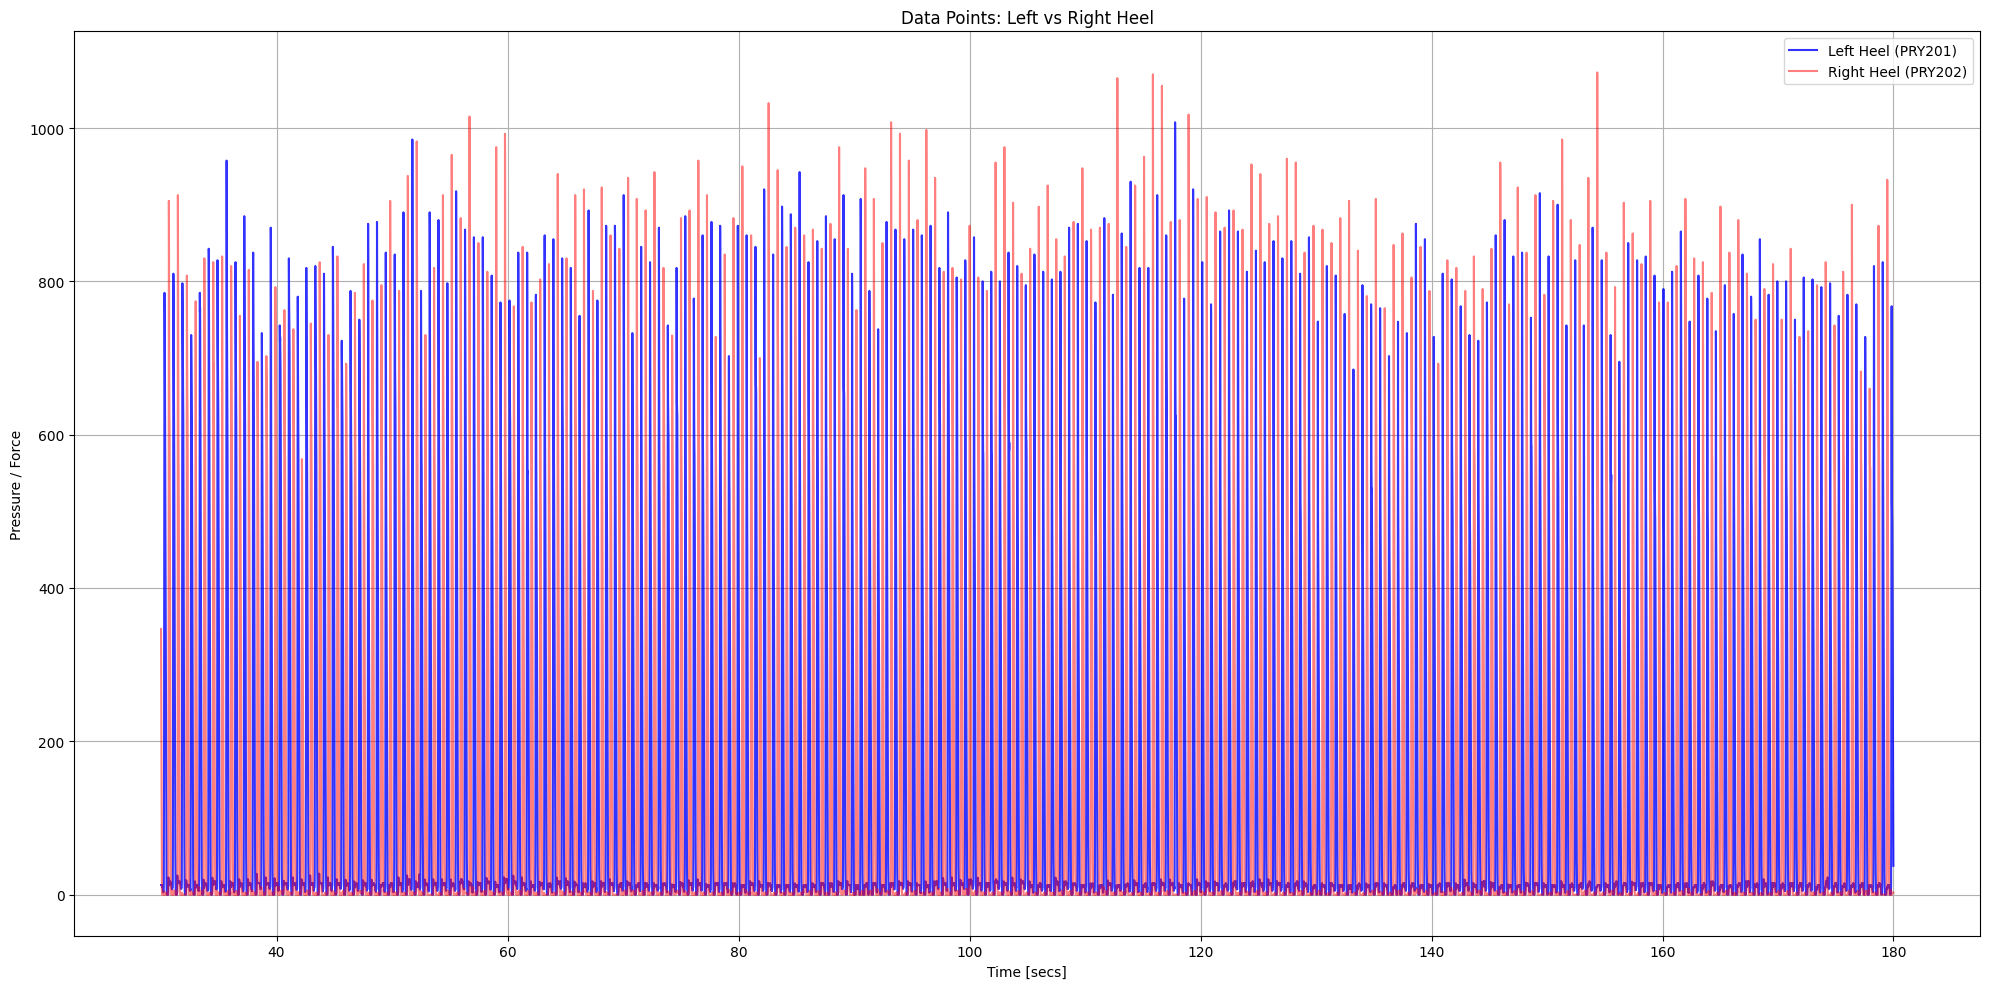

In [14]:
df_mid = loadsolASCII_25_11_11_09_38_11_074_Asphalt.iloc[3000:18000]

plt.figure(figsize=(20, 10))

plt.plot(df_mid['Time[secs]'],
         df_mid['PRY201_L_Heel'],
         label='Left Heel (PRY201)', color='blue', alpha=0.80)

plt.plot(df_mid['Time[secs]'],
         df_mid['PRY202_R_Heel'],
         label='Right Heel (PRY202)', color='red',alpha=0.50)

plt.xlabel('Time [secs]')
plt.ylabel('Pressure / Force')
plt.title('Data Points: Left vs Right Heel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Based on the histogram and the number of zeros in the right and left foot data — as well as the frequency of values close to zero for both sides — it is likely that the participant slightly drags the left foot on the ground. In other words, considering the previous reasoning that the left foot is the dominant one, this suggests that the left foot is being dragged a little during walking.

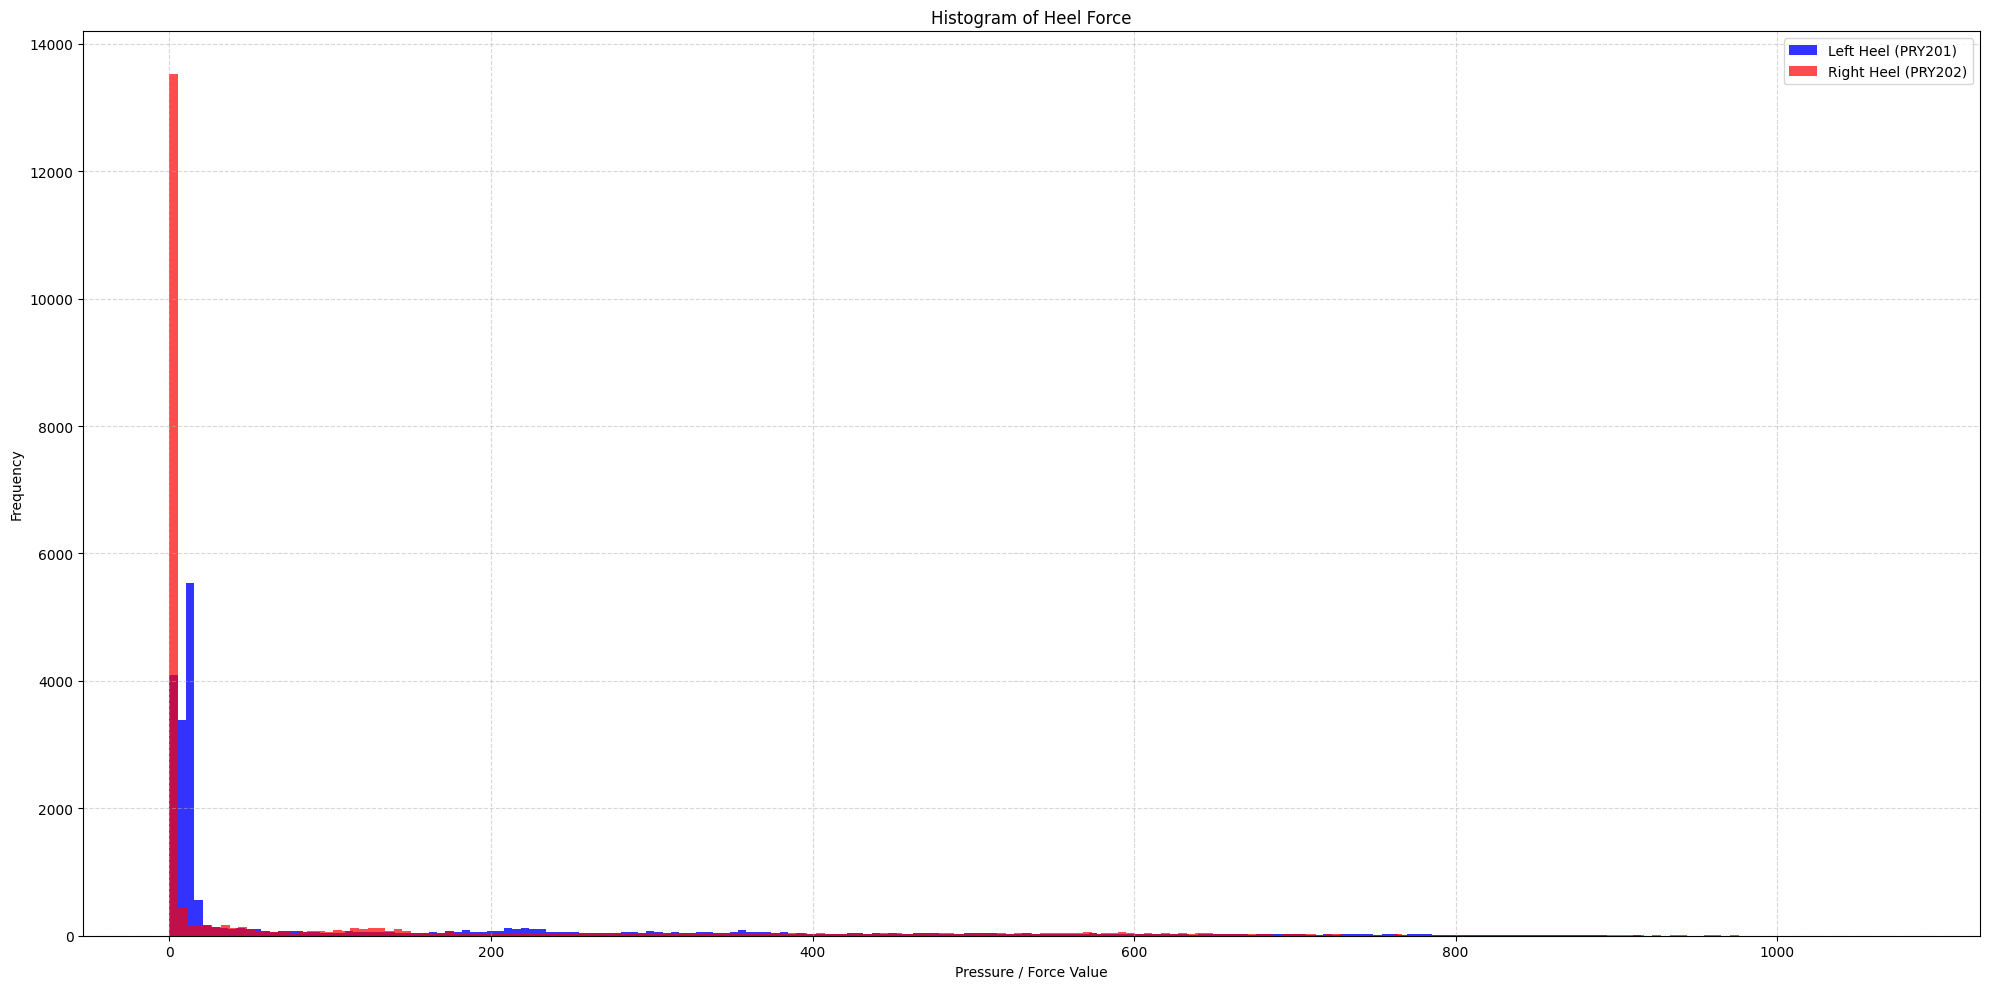

In [15]:
df = loadsolASCII_25_11_11_09_38_11_074_Asphalt

plt.figure(figsize=(20, 10))
plt.hist(df['PRY201_L_Heel'],
         bins=200, alpha=0.80,
         label='Left Heel (PRY201)',
         color='blue')

plt.hist(df['PRY202_R_Heel'],
         bins=200,
         alpha=0.70,
         label='Right Heel (PRY202)',
         color='red')

plt.xlabel('Pressure / Force Value')
plt.ylabel('Frequency')
plt.title('Histogram of Heel Force')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Based on the Shapiro test from the SciPy library, which examines normality, the data distribution in this dataset is not normal.

In [16]:
df = loadsolASCII_25_11_11_09_38_11_074_Asphalt


# drop null (have not any null)
left_data = df['PRY201_L_Heel'].dropna()
right_data = df['PRY202_R_Heel'].dropna()

# shapiro Test for left
stat_left, p_left = stats.shapiro(left_data)
print(f"Left Heel (PRY201) — Shapiro Statistic: {stat_left:.4f}, p-value: {p_left:.4f}")

# shapiro Test for right
stat_right, p_right = stats.shapiro(right_data)
print(f"Right Heel (PRY202) — Shapiro Statistic: {stat_right:.4f}, p-value: {p_right:.4f}")

# Is normal or not
print("-------is normal or Not-----------")
alpha = 0.05
if p_left > alpha:
    print("Left Heel data is normally distributed (fail to reject H0)")
else:
    print("Left Heel data is NOT normally distributed (reject H0)")

if p_right > alpha:
    print("Right Heel data is normally distributed (fail to reject H0)")
else:
    print("Right Heel data is NOT normally distributed (reject H0)")

Left Heel (PRY201) — Shapiro Statistic: 0.6364, p-value: 0.0000
Right Heel (PRY202) — Shapiro Statistic: 0.5794, p-value: 0.0000
-------is normal or Not-----------
Left Heel data is NOT normally distributed (reject H0)
Right Heel data is NOT normally distributed (reject H0)


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20760.
  res = hypotest_fun_out(*samples, **kwds)


1.3.2. we want ro campare the right midfoot with the left midfoot   
Given the mean force, standard deviation, and maximum force, the hypothesis of foot posture gains more strength.  
As can be seen, the force at the midfoot of the right and left feet shows a greater difference compared to each other, which, when considering heel force analysis, further strengthens this hypothesis.

In [17]:
loadsolASCII_25_11_11_09_38_11_074_Asphalt[["PRY201_L_Midfoot","PRY202_R_Midfoot"]].describe()

,PRY201_L_Midfoot,PRY202_R_Midfoot
count,20760.000000,20760.000000
mean,121.036095,92.144541
std,192.086676,173.775337
min,0.000000,0.000000
25%,4.980000,0.000000
50%,9.960000,0.000000
75%,194.880000,68.500000
max,707.370000,653.250000


this chart shows the midfoot force of both midfoot 
each peak represents a step 


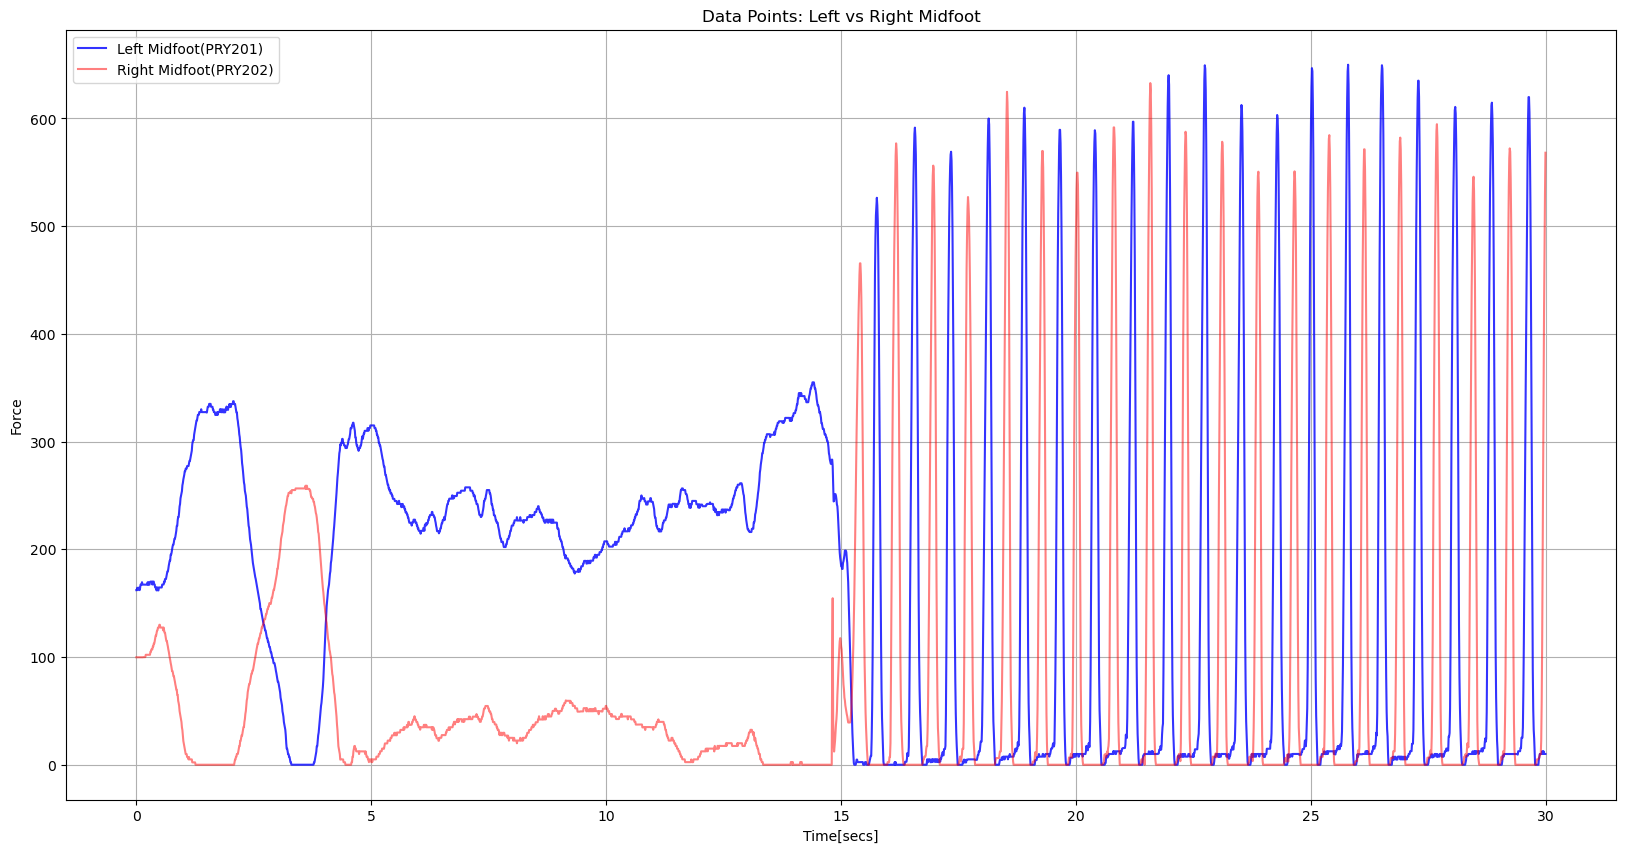

In [25]:
df_first=loadsolASCII_25_11_11_09_38_11_074_Asphalt.iloc[:3000]
plt.figure(figsize=(20,10))
plt.plot(df_first['Time[secs]'],
         df_first["PRY201_L_Midfoot"],
         label="Left Midfoot(PRY201)", color="blue", alpha=0.8)
plt.plot(df_first["Time[secs]"],
         df_first["PRY202_R_Midfoot"],
         label="Right Midfoot(PRY202)", color="red", alpha=0.5)
plt.xlabel("Time[secs]")
plt.ylabel("Force")
plt.title("Data Points: Left vs Right Midfoot")
plt.legend()
plt.grid(True)
plt.show()



the graph shows the end of the movement. the regular step peaks disappear, the force becoms small and irregular and both feet show similar paterns . this happens because the person stops walking or slows down, so the midfoot force naturally becomes unstable and low

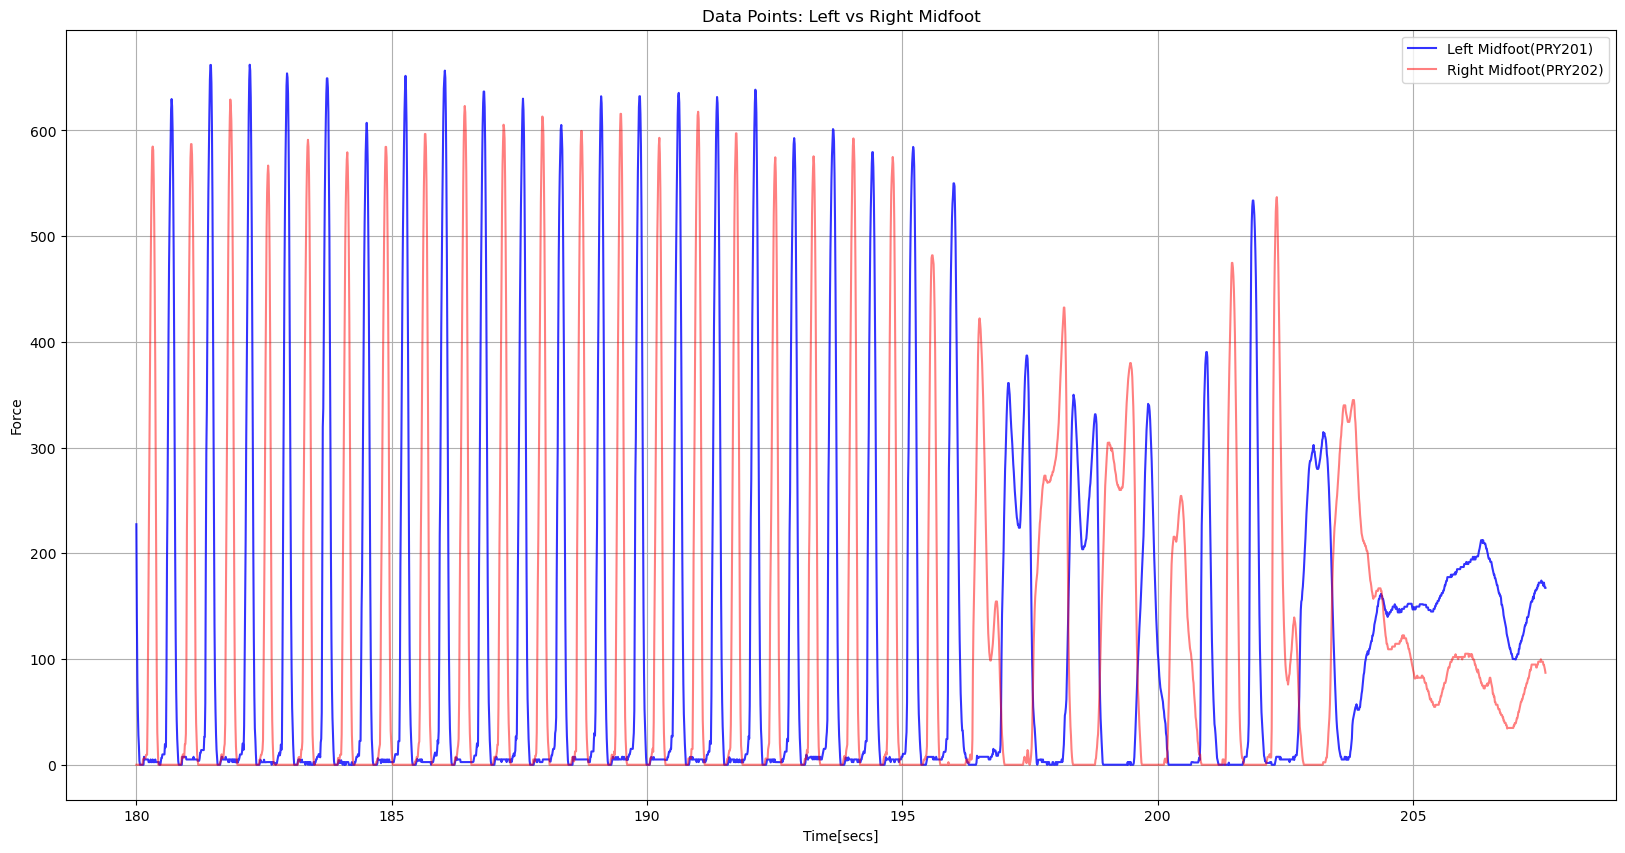

In [26]:
df_end=loadsolASCII_25_11_11_09_38_11_074_Asphalt.iloc[18000:]
plt.figure(figsize=(20,10))
plt.plot(df_end['Time[secs]'],
         df_end["PRY201_L_Midfoot"],
         label="Left Midfoot(PRY201)", color="blue", alpha=0.8)

plt.plot(df_end["Time[secs]"],
         df_end["PRY202_R_Midfoot"],
         label="Right Midfoot(PRY202)", color="red", alpha=0.5)

plt.xlabel("Time[secs]")
plt.ylabel("Force")
plt.title("Data Points: Left vs Right Midfoot")
plt.legend()
plt.grid(True)
plt.show()


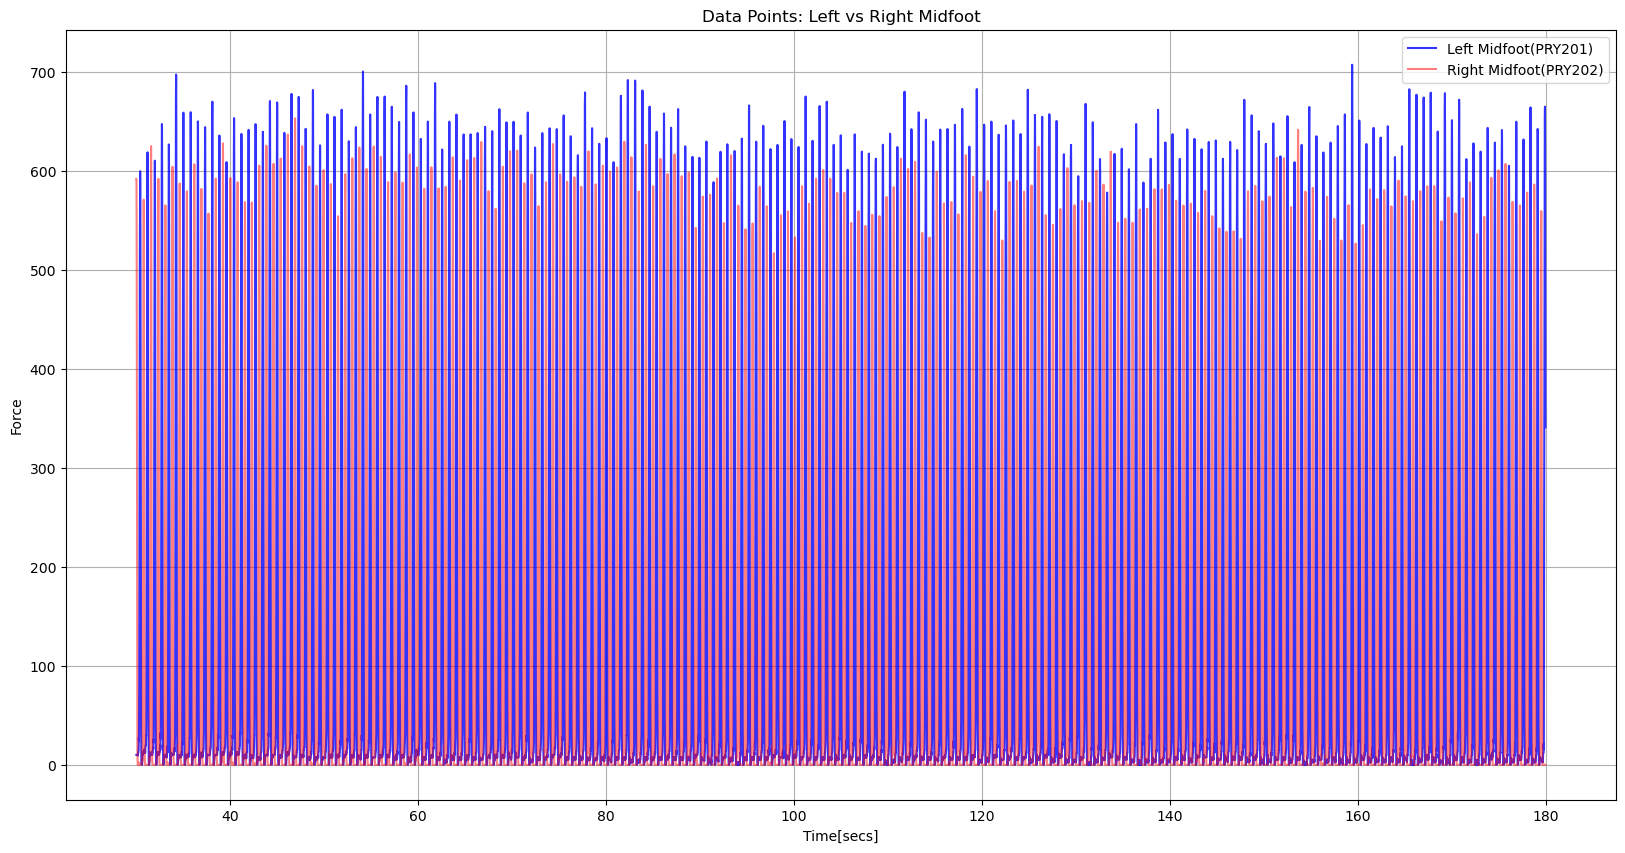

In [38]:
df_mid=loadsolASCII_25_11_11_09_38_11_074_Asphalt.iloc[3000:18000]
plt.figure(figsize=(20,10))
plt.plot(df_mid['Time[secs]'],
         df_mid["PRY201_L_Midfoot"],
         label="Left Midfoot(PRY201)", color="blue", alpha=0.8)

plt.plot(df_mid["Time[secs]"],
         df_mid["PRY202_R_Midfoot"],
         label="Right Midfoot(PRY202)", color="red", alpha=0.5)

plt.xlabel("Time[secs]")
plt.ylabel("Force")
plt.title("Data Points: Left vs Right Midfoot")
plt.legend()
plt.grid(True)
plt.show()


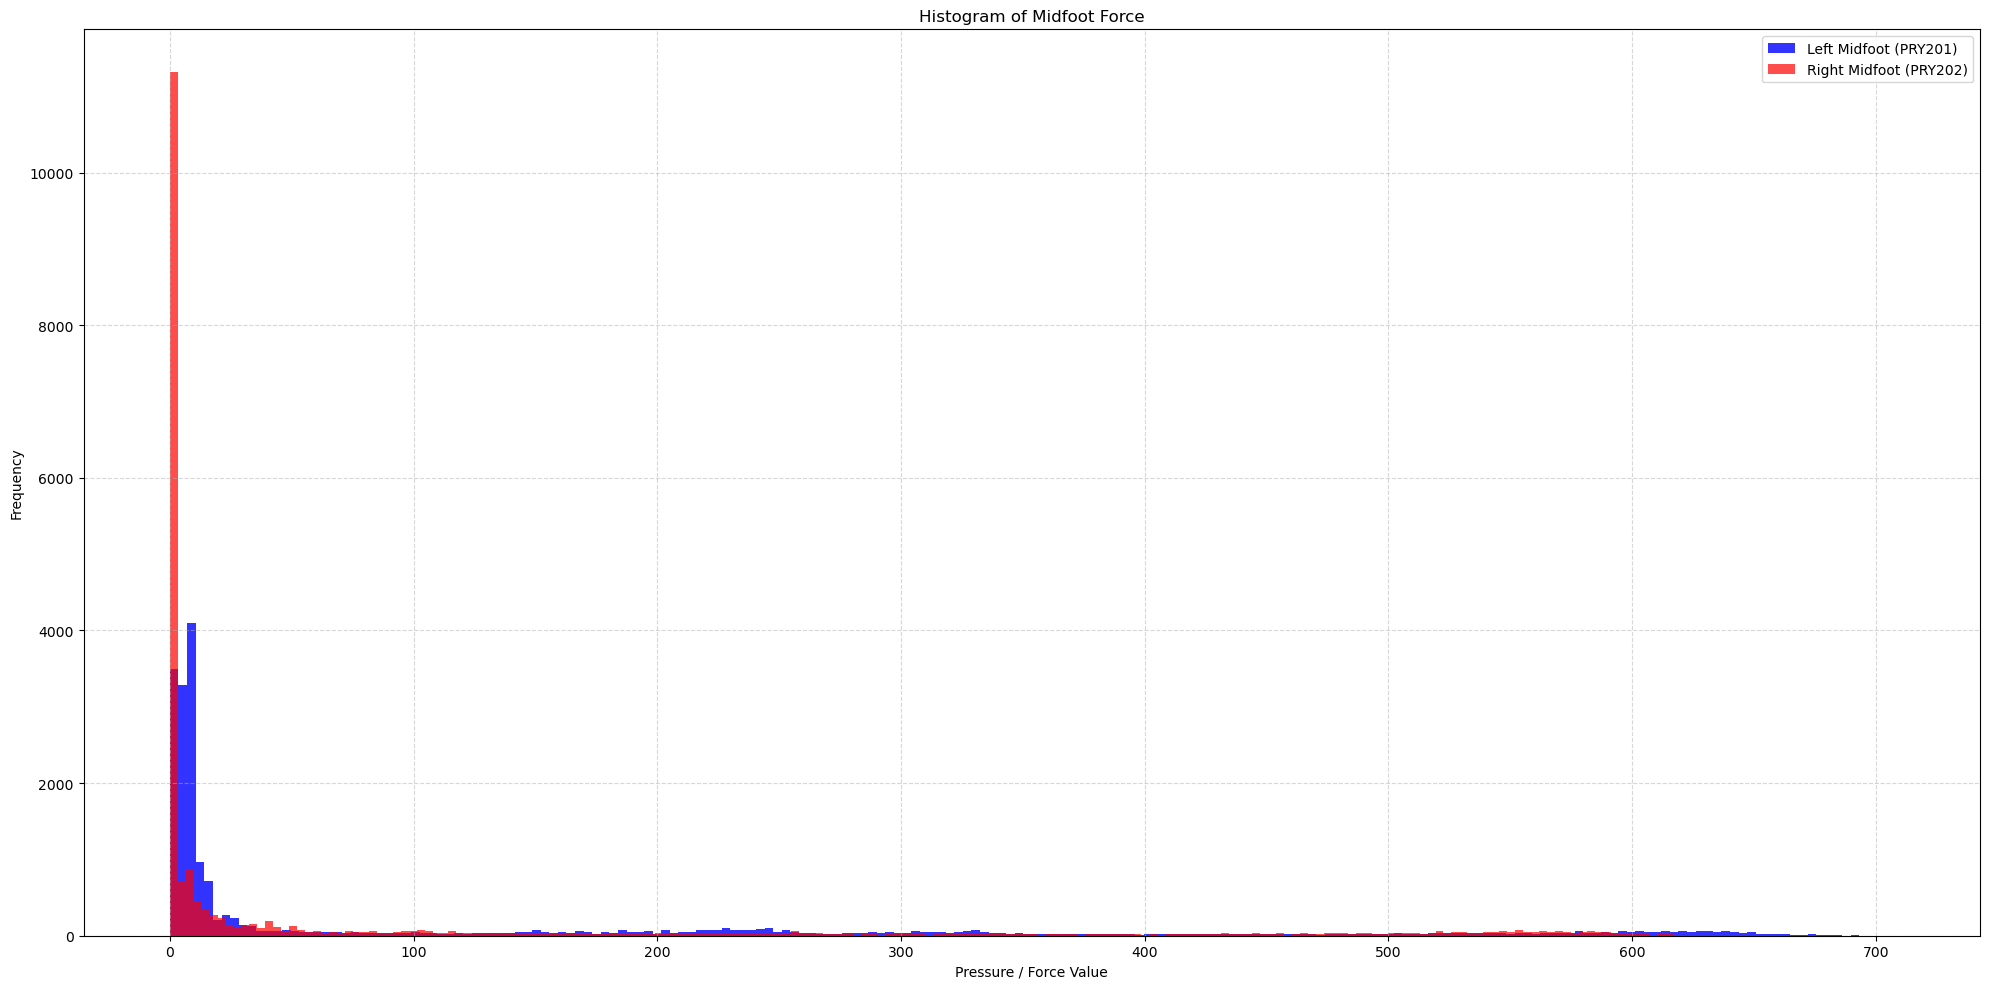

In [39]:
df = loadsolASCII_25_11_11_09_38_11_074_Asphalt

plt.figure(figsize=(20, 10))
plt.hist(df['PRY201_L_Midfoot'],
         bins=200, alpha=0.80,
         label='Left Midfoot (PRY201)',
         color='blue')

plt.hist(df['PRY202_R_Midfoot'],
         bins=200,
         alpha=0.70,
         label='Right Midfoot (PRY202)',
         color='red')

plt.xlabel('Pressure / Force Value')
plt.ylabel('Frequency')
plt.title('Histogram of Midfoot Force')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

we want to compare Forefoot for both right and left foot

In [41]:
loadsolASCII_25_11_11_09_38_11_074_Asphalt.head()

,Time[secs],PRY201_L_Heel,PRY201_L_Midfoot,PRY201_L_Forefoot,PRY201_L,Time[secs].1,PRY202_R_Forefoot,PRY202_R_Midfoot,PRY202_R_Heel,PRY202_R
0,0.00,182.04,162.06,127.28,471.38,0.00,84.68,99.76,145.00,329.44
1,0.01,182.04,162.06,127.28,471.38,0.01,84.68,99.76,142.10,326.54
2,0.02,185.00,164.28,127.28,476.56,0.02,87.00,99.76,142.10,328.86
3,0.03,182.04,162.06,127.28,471.38,0.03,87.00,99.76,139.78,326.54
4,0.04,182.04,164.28,127.28,473.60,0.04,87.00,99.76,137.46,324.22


In [45]:
loadsolASCII_25_11_11_09_38_11_074_Asphalt[["PRY201_L_Forefoot", "PRY202_R_Forefoot"]].describe()

,PRY201_L_Forefoot,PRY202_R_Forefoot
count,20760.000000,20760.000000
mean,163.689862,172.023140
std,251.682801,269.157698
min,0.000000,0.000000
25%,0.000000,0.000000
50%,5.000000,9.750000
75%,231.020000,253.937500
max,982.500000,1057.500000


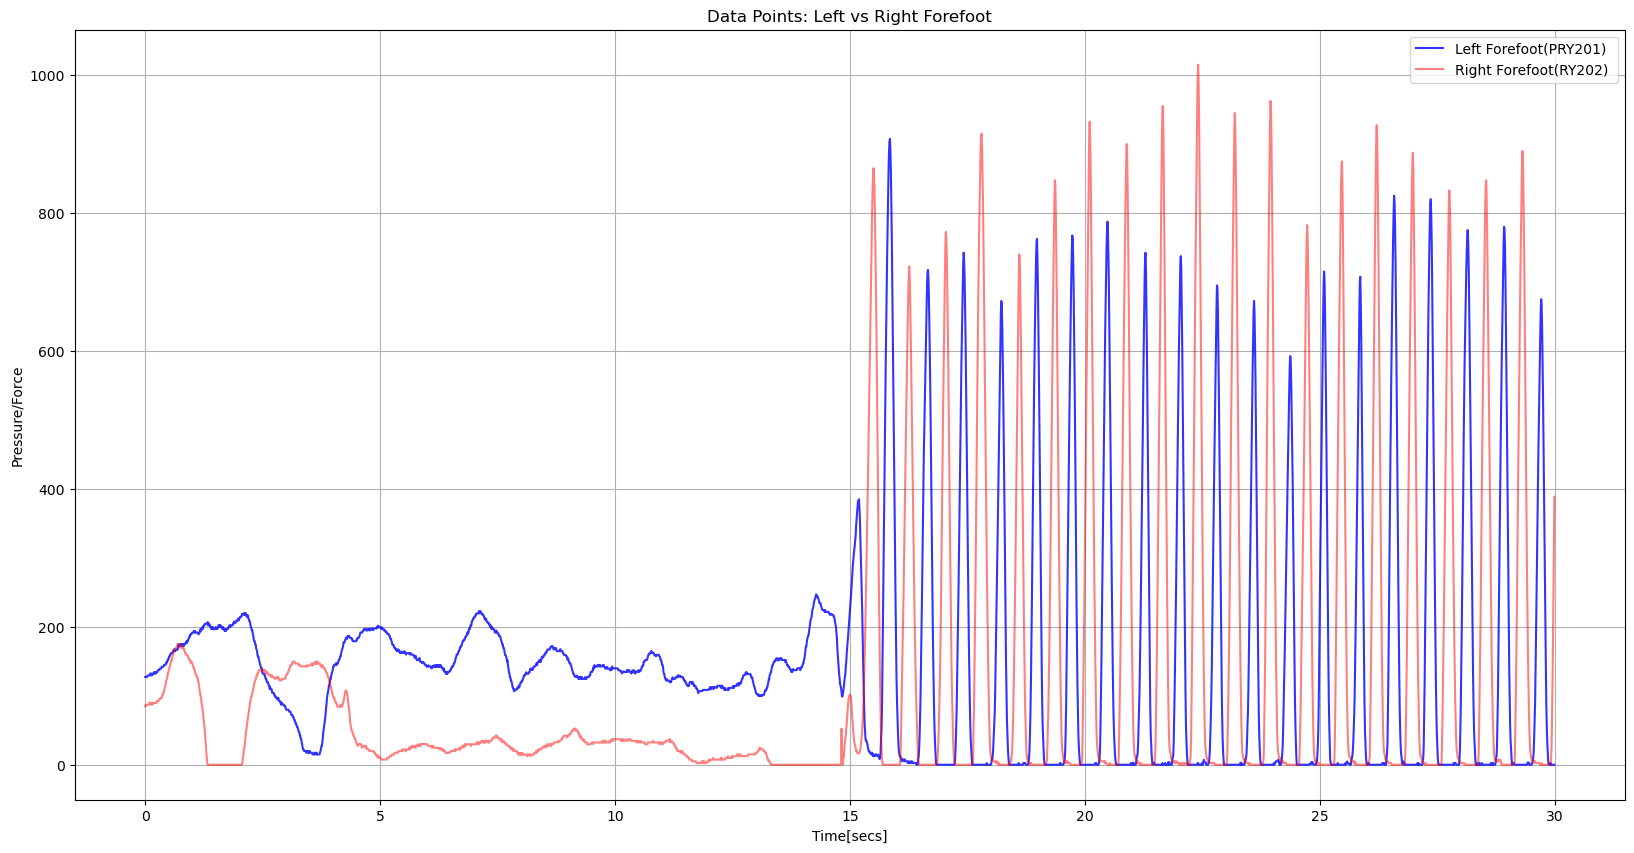

In [48]:
df_first=loadsolASCII_25_11_11_09_38_11_074_Asphalt.iloc[:3000]
plt.figure(figsize=(20,10))
plt.plot(df_first['Time[secs]'],
         df_first["PRY201_L_Forefoot"],
         label="Left Forefoot(PRY201)", color="blue", alpha=0.8)

plt.plot(df_first['Time[secs]'],
         df_first["PRY202_R_Forefoot"],
         label="Right Forefoot(RY202) ", color="red", alpha=0.5)

plt.xlabel("Time[secs]")
plt.ylabel("Pressure/Force")
plt.title("Data Points: Left vs Right Forefoot")

plt.legend()
plt.grid(True)
plt.show()

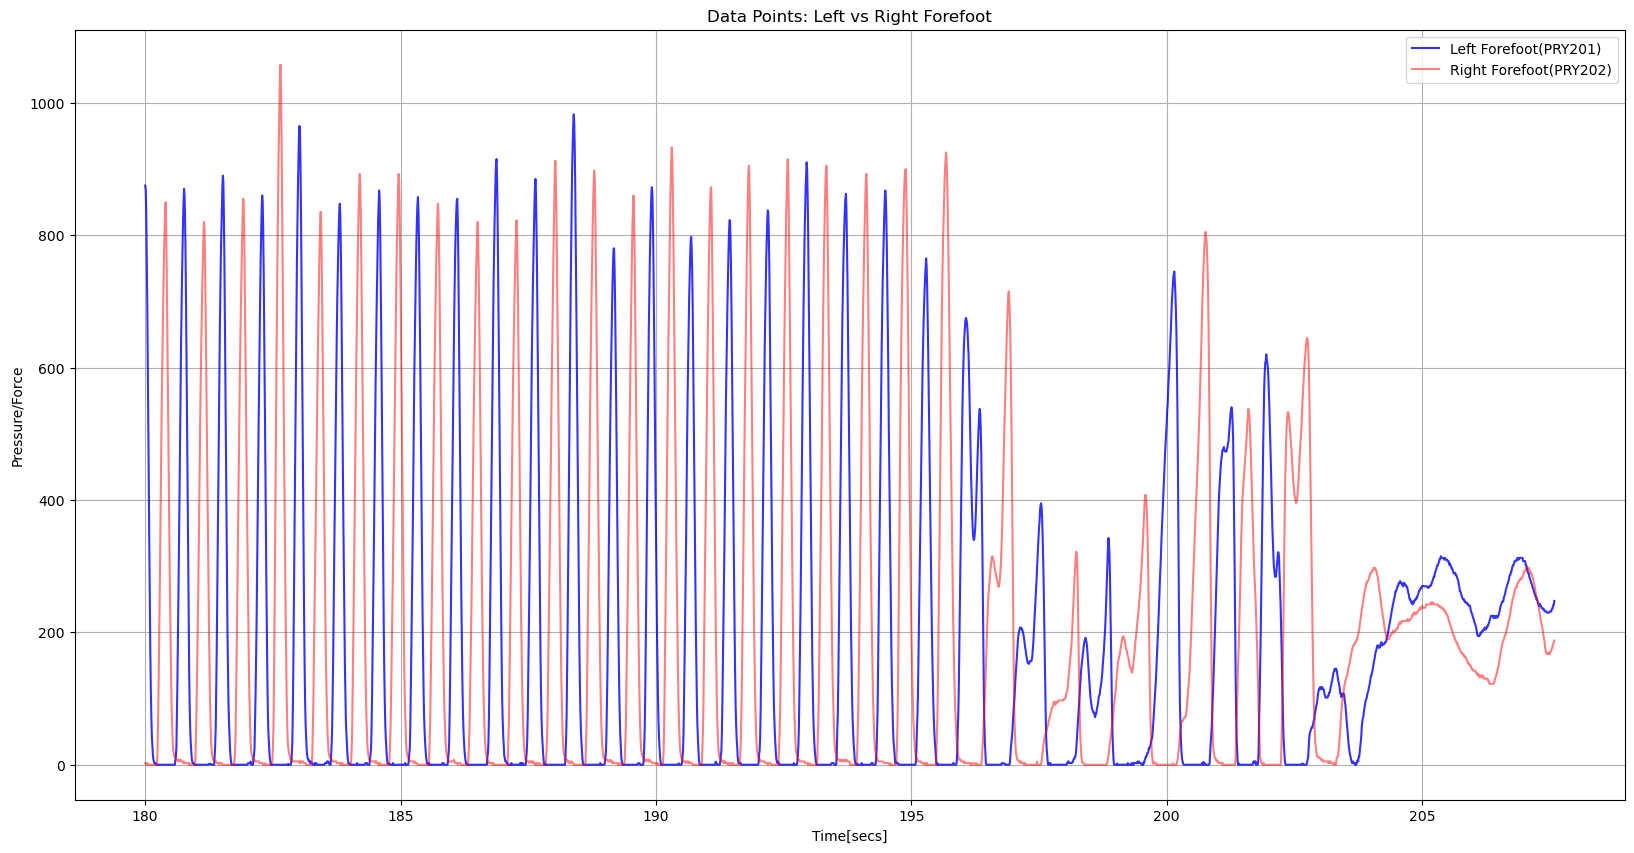

In [58]:
df_end=loadsolASCII_25_11_11_09_38_11_074_Asphalt.iloc[18000:]
plt.figure(figsize=(20,10))


plt.plot(df_end['Time[secs]'],
         df_end["PRY201_L_Forefoot"],
         label="Left Forefoot(PRY201)", color="blue", alpha=0.8)
plt.plot(df_end["Time[secs]"],
         df_end["PRY202_R_Forefoot"],
         label="Right Forefoot(PRY202)", color="red", alpha=0.50)

plt.xlabel("Time[secs]")
plt.ylabel("Pressure/Force")
plt.title("Data Points: Left vs Right Forefoot")


plt.legend()
plt.grid(True)
plt.show()


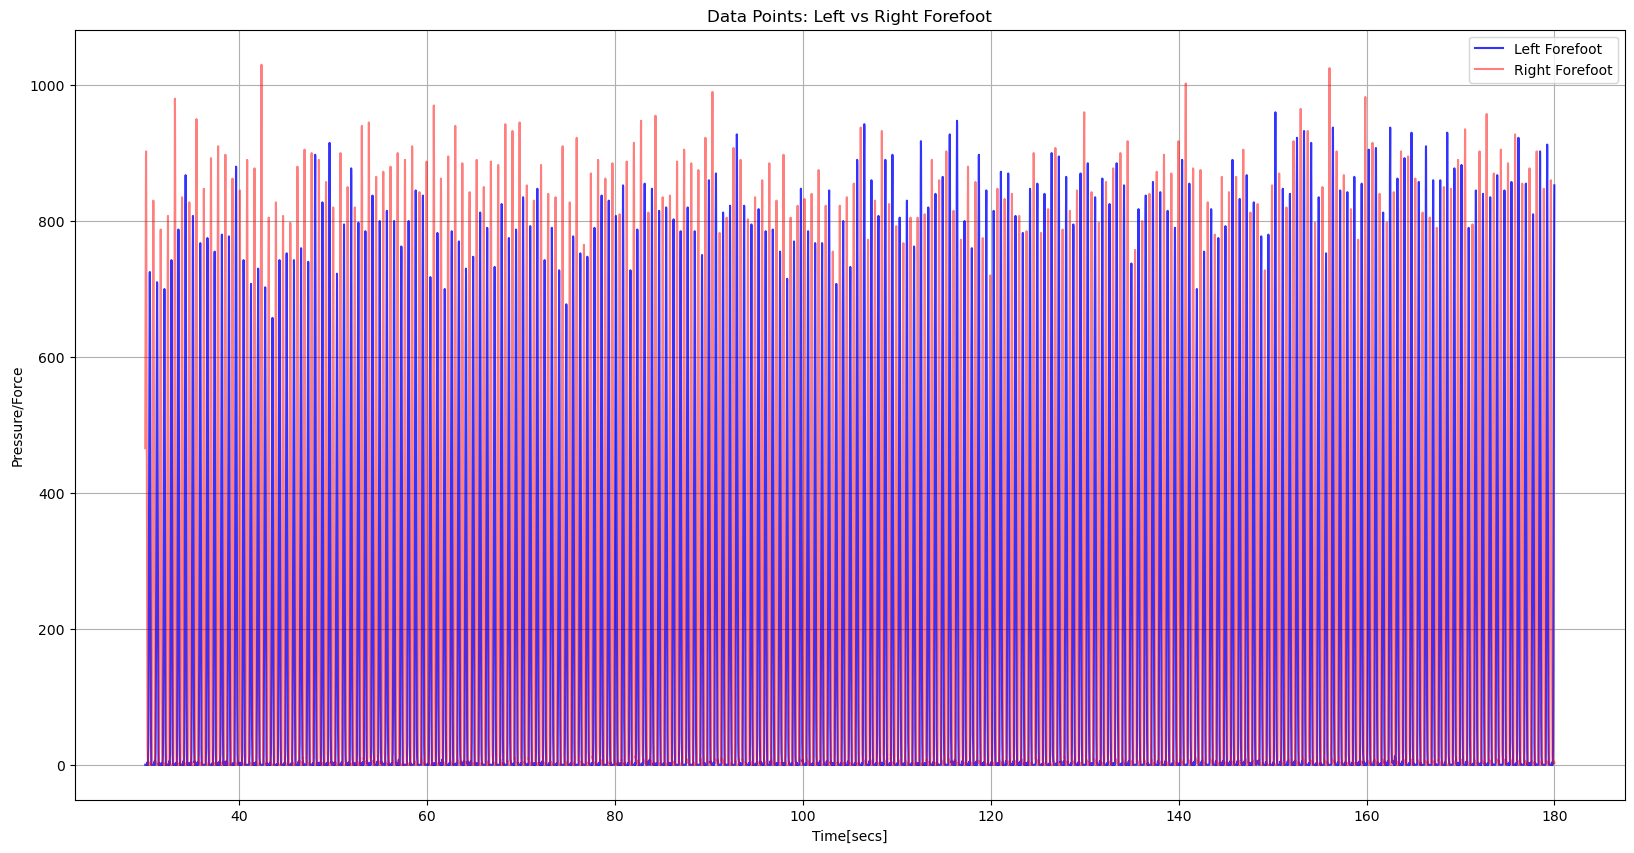

In [63]:
df_mid=loadsolASCII_25_11_11_09_38_11_074_Asphalt.iloc[3000:18000]
plt.figure(figsize=(20,10))
plt.plot(df_mid["Time[secs]"],
        df_mid["PRY201_L_Forefoot"],
         label="Left Forefoot", color="blue", alpha=0.8)

plt.plot(df_mid["Time[secs]"],
         df_mid["PRY202_R_Forefoot"],
         label="Right Forefoot", color="red", alpha=0.5)


plt.xlabel("Time[secs]")
plt.ylabel("Pressure/Force")
plt.title("Data Points: Left vs Right Forefoot")


plt.legend()
plt.grid(True)
plt.show()

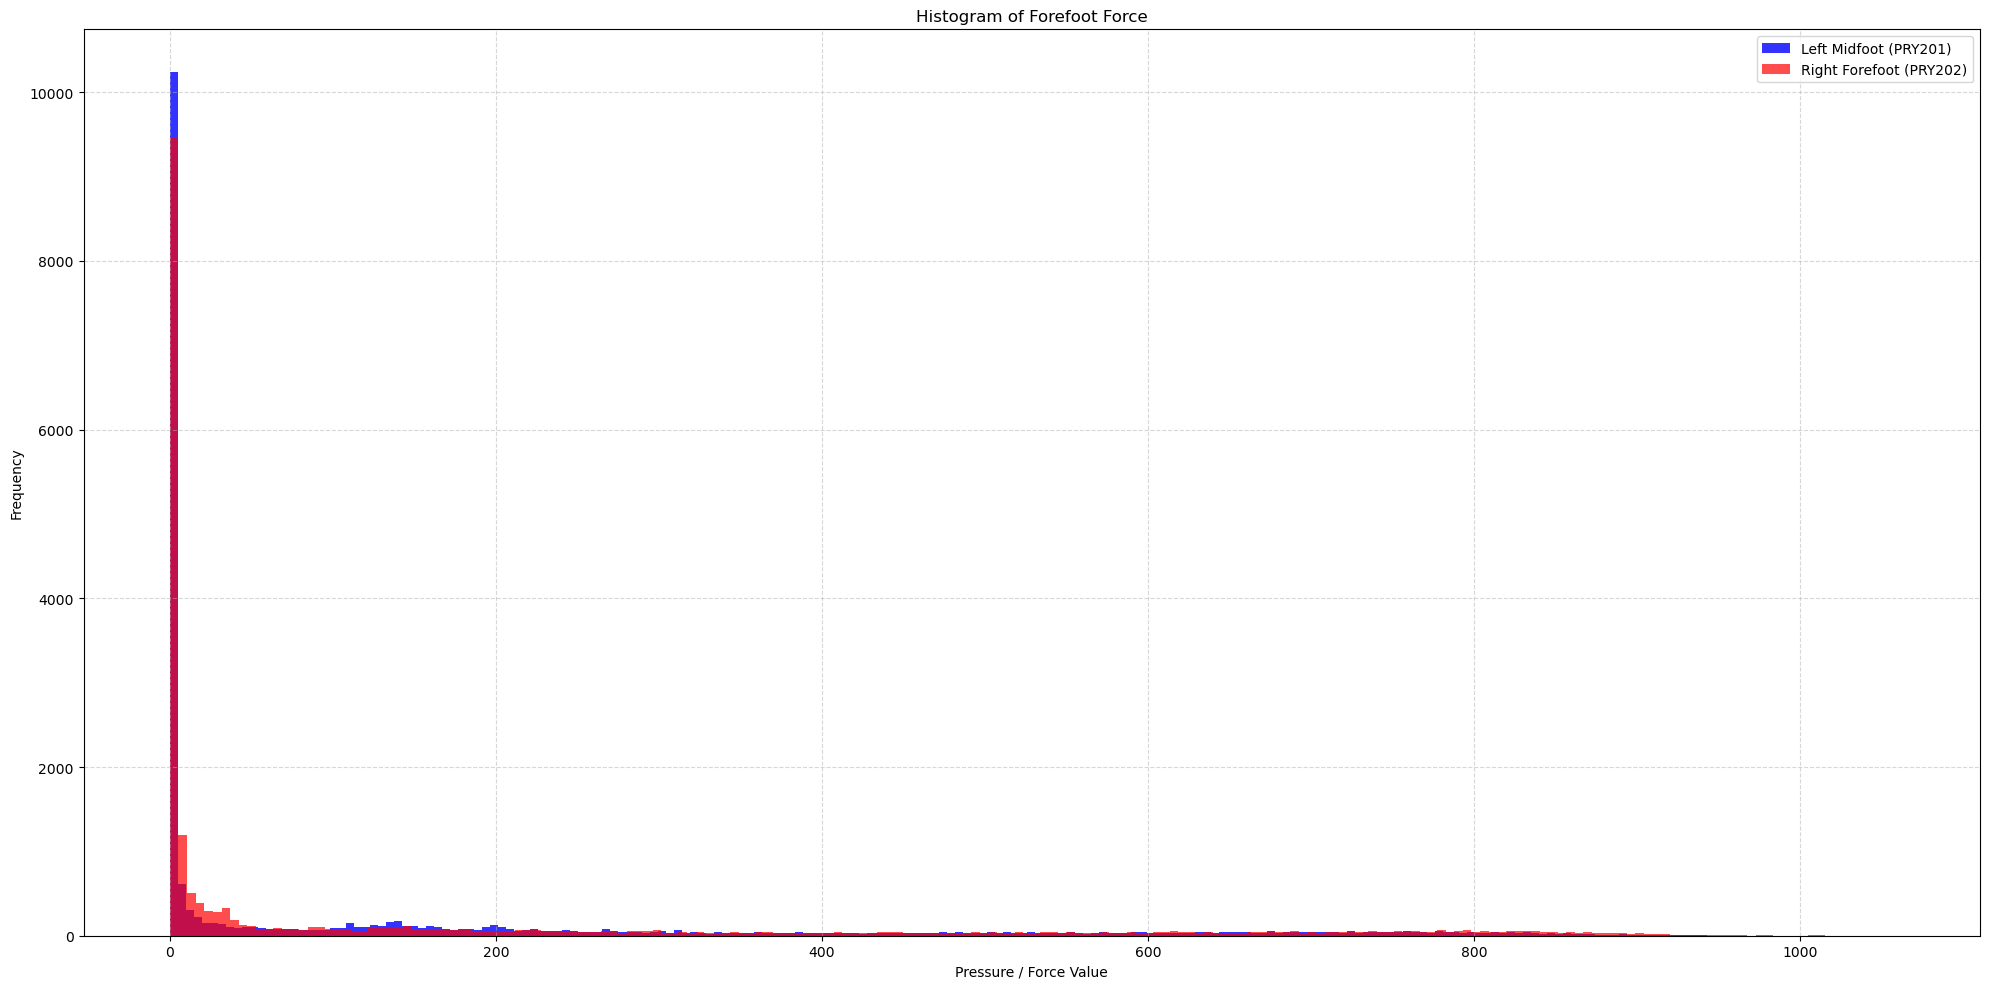

In [65]:
df = loadsolASCII_25_11_11_09_38_11_074_Asphalt

plt.figure(figsize=(20, 10))
plt.hist(df['PRY201_L_Forefoot'],
         bins=200, alpha=0.80,
         label='Left Midfoot (PRY201)',
         color='blue')

plt.hist(df['PRY202_R_Forefoot'],
         bins=200,
         alpha=0.70,
         label='Right Forefoot (PRY202)',
         color='red')

plt.xlabel('Pressure / Force Value')
plt.ylabel('Frequency')
plt.title('Histogram of Forefoot Force')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

we want to compare Left foot with right food of next experiment loadsolASCII_25_11_11_14_21_20_634_Asphalt

In [29]:
loadsolASCII_25_11_11_14_21_20_634_Asphalt.head()

,Time[secs],PRX333_L_Heel,PRX333_L_Midfoot,PRX333_L_Forefoot,PRX333_L,Time[secs].1,PRX334_R_Forefoot,PRX334_R_Midfoot,PRX334_R_Heel,PRX334_R
0,0.00,287.50,66.7,74.75,428.95,0.00,19.76,41.60,142.48,203.84
1,0.01,281.75,64.4,74.75,420.90,0.01,21.84,44.72,146.64,213.20
2,0.02,274.85,64.4,74.75,414.00,0.02,24.96,49.92,157.04,231.92
3,0.03,266.80,62.1,74.75,403.65,0.03,29.12,52.00,167.44,248.56
4,0.04,262.20,59.8,74.75,396.75,0.04,37.44,54.08,174.72,266.24


In [31]:
loadsolASCII_25_11_11_14_21_20_634_Asphalt=loadsolASCII_25_11_11_14_21_20_634_Asphalt.dropna()
loadsolASCII_25_11_11_14_21_20_634_Asphalt.isnull().sum()

Time[secs]           0
PRX333_L_Heel        0
PRX333_L_Midfoot     0
PRX333_L_Forefoot    0
PRX333_L             0
Time[secs].1         0
PRX334_R_Forefoot    0
PRX334_R_Midfoot     0
PRX334_R_Heel        0
PRX334_R             0
dtype: int64

In [32]:
loadsolASCII_25_11_11_14_21_20_634_Asphalt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20130 entries, 0 to 20129
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time[secs]         20130 non-null  float64
 1   PRX333_L_Heel      20130 non-null  float64
 2   PRX333_L_Midfoot   20130 non-null  float64
 3   PRX333_L_Forefoot  20130 non-null  float64
 4   PRX333_L           20130 non-null  float64
 5   Time[secs].1       20130 non-null  float64
 6   PRX334_R_Forefoot  20130 non-null  float64
 7   PRX334_R_Midfoot   20130 non-null  float64
 8   PRX334_R_Heel      20130 non-null  float64
 9   PRX334_R           20130 non-null  float64
dtypes: float64(10)
memory usage: 1.7 MB


In [34]:
loadsolASCII_25_11_11_14_21_20_634_Asphalt.describe()

,Time[secs],PRX333_L_Heel,PRX333_L_Midfoot,PRX333_L_Forefoot,PRX333_L,Time[secs].1,PRX334_R_Forefoot,PRX334_R_Midfoot,PRX334_R_Heel,PRX334_R
count,20130.000000,20130.000000,20130.000000,20130.000000,20130.000000,20130.000000,20130.000000,20130.000000,20130.000000,20130.000000
mean,100.645000,71.171171,79.669829,213.963070,364.804070,100.645000,212.650382,79.209547,65.053634,356.913563
std,58.111748,144.371690,142.883265,381.503084,553.334244,58.111748,376.053167,144.100668,148.484387,544.412438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.322500,0.000000,0.000000,0.000000,4.970000,50.322500,0.000000,0.000000,0.000000,2.500000
50%,100.645000,2.500000,4.960000,3.780000,17.290000,100.645000,5.000000,2.500000,0.000000,17.440000
75%,150.967500,49.800000,69.920000,158.012500,538.320000,150.967500,161.260000,74.900000,36.750000,540.120000
max,201.290000,1190.160000,598.980000,1367.500000,1828.580000,201.290000,1442.500000,613.440000,1225.000000,2043.300000
